DataSet:
The dataset that was analyzed is Titanic Data
Contains the information from 891 of the 2224 passengers and crew on board the Titanic. The information ranges from their name's , age , sex, ticket class to whether they survived the crash or not (i.e. the demographics and the passenger details).


    

Questions that are to be answered:

1.What is the survival rate of passengers depending on their ticket class?

2.What percentage of which sex survived the crash?

3.What was the survival status of the persons in different age groups?

4.How the survival of the people of the two gender is affected by their  embarked location and Pclass?

5.Does fare have any relationship with the survival?


I used two approaches to answer the above questions:

1.Analyze by pivoting features

To have answer to some of our questions one of the quickest ways is to pivot features against each other and it makes sense to do it for the categorical, ordinal or discrete features.

2.Anzalyze by visualizing data

This can be used best for understanding correlations between features and our goal that is Survived, we make use of histograms and other plots in it.


Data Wrangling:

There is data missing in the age column at different intervals.
And there is some data also missing in the Embarked column.
We are dealing with the missing data by using the fillna method to fill those cells.

The cells in Ticket column have data which is a mix of numerical and alphanumerical.

Then their is the case of data given in the Ticket, Name, PassengerId and Cabin columns, as per my understanding we don't need that data to answer any of the above questions so I think that we could remove them without causing any hinderance in our investigation.


In [1]:
#data analysis and wrangling

import pandas as pd
import numpy as np

import seaborn as sns
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

titanic_df = pd.read_csv('E:/Aniruddha/Education/Courses/Data Science/Nanodegree/titanic-data.csv')




Populating the interactive namespace from numpy and matplotlib


In [2]:
#used to gain insight about the given data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
#removing unwanted columns

titanic_df.drop(['Ticket', 'Cabin','Name','PassengerId' ], axis = 1, inplace = True)

In [4]:
#seeing the state of data
titanic_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Q1:What is the survival rate of passengers depending on their ticket class?



In [5]:
#it shows us the survival rates of passengers on the basis of their travelling class
titanic_df.fillna(value = 0)
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

print titanic_df.Embarked[61]




nan


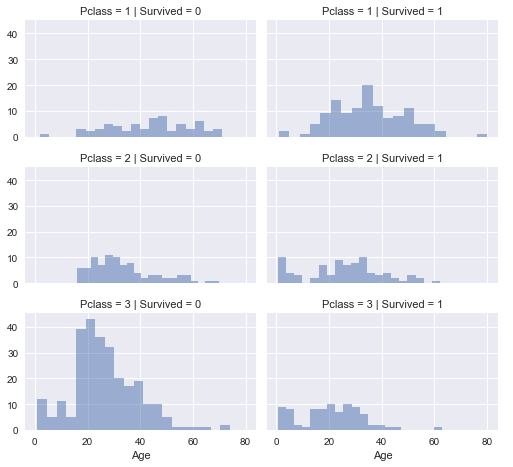

In [6]:
pclass = sns.FacetGrid(titanic_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pclass.map(plt.hist, 'Age', alpha=.5, bins=20)
pclass.add_legend();

The observations that we can make from the above values and graph is that Pclass 3 had most passengers but most of them did not survived.

The infants in class 2 and 3 mostly survived

The class with the highest survival rate is Pclass 1

And one iteresting thing that we can see from the above graphs is the age variations in different classes.


Q2.What percentage of which sex survived the crash?

In [7]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
titanic_df.describe(include=['O'])

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


Observations:
The female sex have higher survival rate then the male but we must keep in mind that their number is way less than the male sex, which could be also a reason for such a great difference between the survival rate of the two sexes.


Q3.What was the survival status of the persons in different age groups?


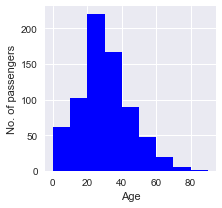

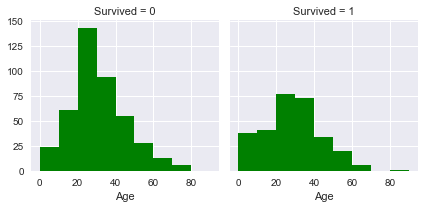

In [9]:
#here I am also showing a single variable exploration by showing the
#passengers age distribution
s = sns.FacetGrid(titanic_df)
s.map(plt.hist, 'Age', bins=range(0,100,10), color = 'b')
plt.ylabel('No. of passengers')

h = sns.FacetGrid(titanic_df, col='Survived')
h.map(plt.hist, 'Age', bins=range(0,100,10), color = 'g')


The observations we can make from the above graphs are as following:

Infants i.e. with age less than or equal to 5 has a high survival rate

Oldest passengers of Age >= 80 survived

Large number of people in age interval 20 to 40 didn't survived

Most passengers are in age group 20 to 40


Q4.How the survival of the people of the two gender is affected by their embarked location and Pclass?


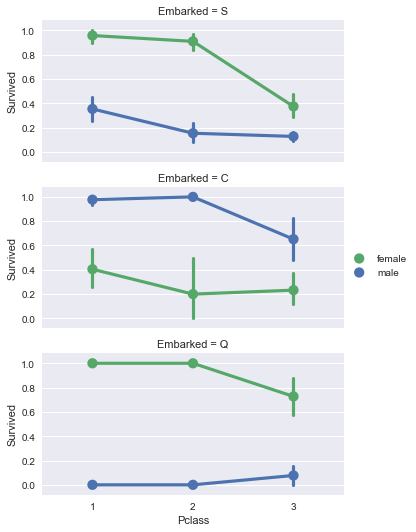

In [10]:
emb = sns.FacetGrid(titanic_df, row='Embarked', size=2.5, aspect=2.0)
emb.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
emb.add_legend()

Observations:
As we have seen that female passengers had a much greater survival chance than the males.

And we can also see that for ports C and Q males those where travelling in Pclass 3 had a better survival rate.

But the above plot can cause a problem in clearly judging the srvival rates for the male and female at diffierent ports as in the case of Embarked = C where one can tend to believe that male has a higher survival rate so we are using the following data and  plot to clearly understand that.


In [11]:
titanic_df.groupby(['Embarked', 'Pclass', 'Sex'])['Survived'].mean()

Embarked  Pclass  Sex   
C         1       female    0.976744
                  male      0.404762
          2       female    1.000000
                  male      0.200000
          3       female    0.652174
                  male      0.232558
Q         1       female    1.000000
                  male      0.000000
          2       female    1.000000
                  male      0.000000
          3       female    0.727273
                  male      0.076923
S         1       female    0.958333
                  male      0.354430
          2       female    0.910448
                  male      0.154639
          3       female    0.375000
                  male      0.128302
Name: Survived, dtype: float64

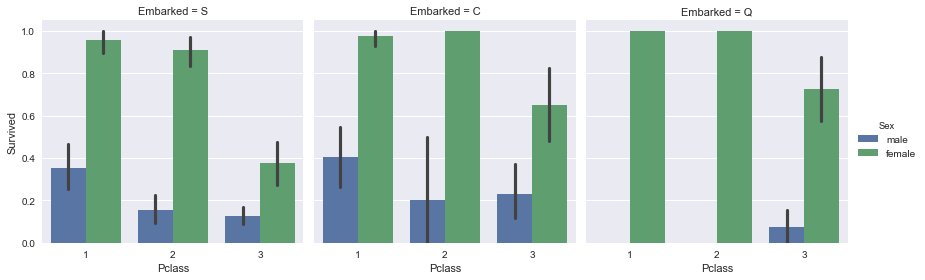

In [12]:

sns.factorplot(data=titanic_df,col='Embarked', x='Pclass', hue='Sex', y='Survived', kind='bar')

Now from the above graph we can clearly see that whatever the port and the travel class females has a better survival rate.

Q5.Does fare have any relationship with the survival?

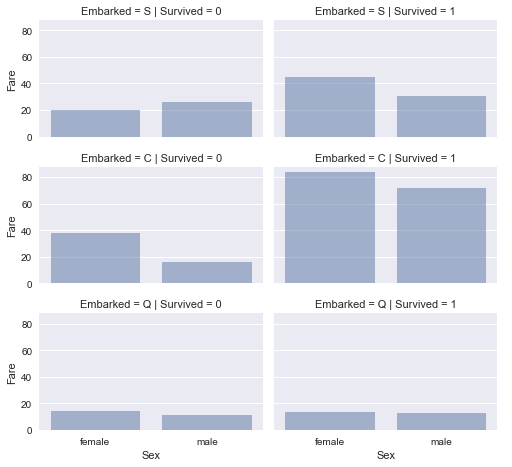

In [13]:
emb2 = sns.FacetGrid(titanic_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
emb2.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
emb2.add_legend()

Observsations:
Here we have correlated Fare, Embarked and Sex with Survived.

Which resulted in the above graphs from which we can surely infer that passengers who paid higher fare had a better survival 
rate which in turn gives us a reason that survival rate is correlated with the class of travel

Conclusion:

First thing that we should keep in mind for the above observations is that it is made on an incomplete dataset which did not include all the passengers. So any relation or observation we made can change if the more values is added to the data.

Then the data does not clearly explain the information given to us.
For example the data related to fare is not provided us with the way it was calculated, as it is varying for the same ticket from the same place.

One way we can improve the observations regarding the fare feature is in the following way:

1.Create a new feature sizeoffamily by combining Parch and SibSp which in turn help us in droping them.

2.And from sizeoffamily we can create a feature isalone for passengers.

3.We can then create different farebands and covert the fare feature into ordinal values based on the farebands.

4.This leads us to better analyze other features with the fare feature as now we can know whether the fare is for a single person or multiple.

There are features like age and embarked which have unfilled values in the given data and which are assumed to be 0 and null by us for the computaion, so it is must to know that we cannot definitely say to what extent our conclusions are correct without performing additional tests on them.




Hypothesis Test:

We can perform the Chi Square test to validate our findings. 
Here we are applying it on the following scenario.
We found that female passengers had a higher survial rate so we say we had hypothesis:

h0: survival chance is not affected by a person sex

h1:survival is affected by a person 



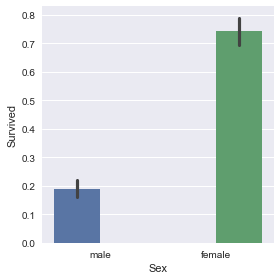

In [14]:
sns.factorplot(data=titanic_df, x='Sex', hue='Sex', y='Survived', kind='bar')

The above graph shows the proportions of survivors by their gender

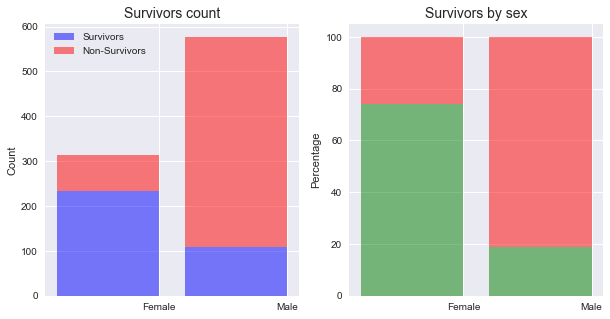

In [15]:
def percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent


survived = titanic_df[titanic_df.Survived==True]
died = titanic_df[titanic_df.Survived==False]

# calculate values for each survival status
s_sex = survived.groupby(['Sex']).size().values
d_sex = died.groupby(['Sex']).size().values

total = s_sex + d_sex

# use calculate_percentage_function to calculate percentage of the total
d1 = percentage(s_sex, total)*100 
d2 = percentage(d_sex, total)*100 

gender = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(s_sex)), s_sex, label='Survivors', alpha=0.5, color='b')
ax1.bar(range(len(d_sex)), d_sex, bottom=s_sex, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Survivors count",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(d1)), d1, alpha=0.5, color='g')
ax2.bar(range(len(d2)), d2, bottom=d1, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4], gender)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("Survivors by sex",fontsize=14)

As earlier noted there where more males on board the titanic but from above plots one can see that more females survived in comparison to males which shows that females had a higher survival rate.

Now for chi square values we make use of scipy:


In [16]:
from scipy import stats

table = pd.crosstab([titanic_df['Survived']], titanic_df['Sex'])
chi, p, dof, expected = stats.chi2_contingency(table.values)
result = [
    ['Item','Value'],
    ['Chi-Square Test',chi],
    ['P-Value', p]
]

for itr in result:
    print '\t'.join(str(i) for i in itr) 

Item	Value
Chi-Square Test	260.717020167
P-Value	1.19735706278e-58


As we can see that the p value is less than 0.05 it means the chances of survival being affected by sex is high. So, we can discard the null hypothesis.

Thus this test helps us in proving our observations.